In [1]:
from os import pipe
import torch

In [2]:
%pip install --upgrade diffusers[torch]


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
from diffusers import DiffusionPipeline, LCMScheduler

In [4]:
model_id = "stabilityai/stable-diffusion-xl-base-1.0"
lcm_lora_id = "latent-consistency/lcm-lora-sdxl"

In [5]:
pipe = DiffusionPipeline.from_pretrained(model_id, variant = "fp16")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
pipe.load_lora_weights(lcm_lora_id)

In [7]:
pipe.scheduler = LCMScheduler.from_config(pipe.scheduler.config)

The config attributes {'skip_prk_steps': True} were passed to LCMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [8]:
pipe.to(device="cpu", dtype=torch.float32)

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "LCMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [9]:
prompt = "close-up photography of an old man standing in the rain at night, in a street light by lamps, leica 35mm summilux"

In [10]:
images = pipe (
    prompt = prompt,
    num_inference_steps = 5,
    guidance_scale = 1,
).images[0]

  0%|          | 0/5 [00:00<?, ?it/s]

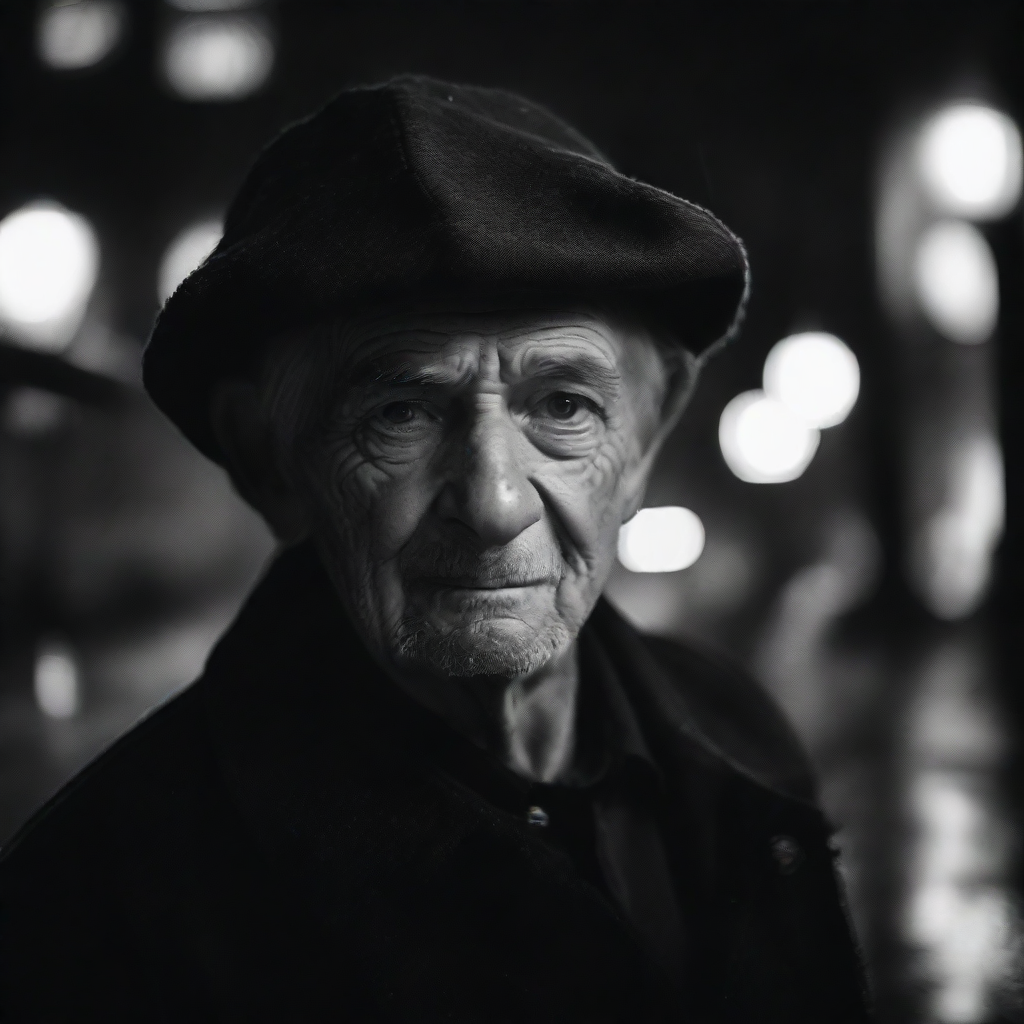

In [11]:
images

In [13]:
images = []
for steps in range(3):
    generator = torch.Generator(device= pipe.device).manual_seed(1337)
    image = pipe(
        prompt = prompt,
        num_inference_steps= steps+1,
        guidance_scale= 1,
        generator = generator,
    ).images[0]
    images.append(image)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

In [14]:
images

[<PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>,
 <PIL.Image.Image image mode=RGB size=1024x1024>]

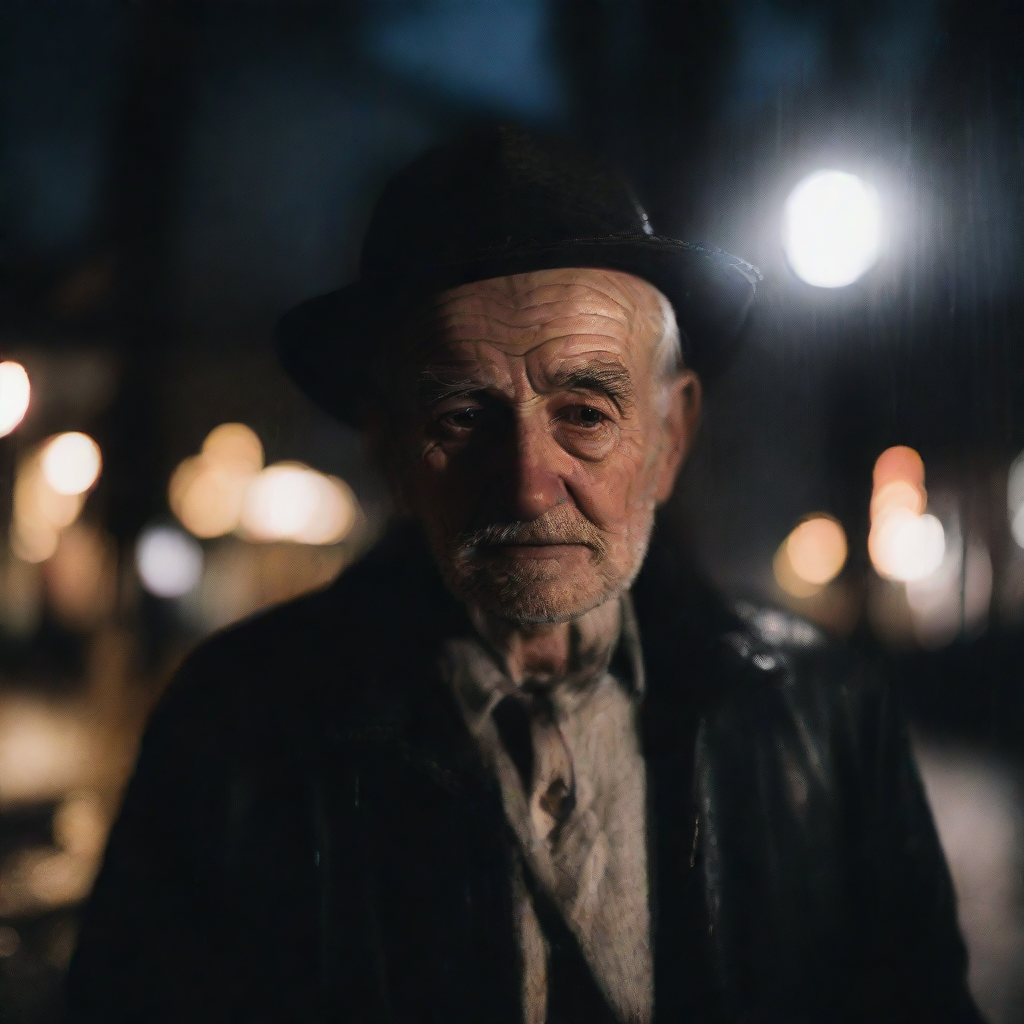

In [21]:
images[2]

In [22]:
pipe.unload_lora_weights()

You are using `unload_lora_weights` to disable and unload lora weights. If you want to iteratively enable and disable adapter weights,you can use `pipe.enable_lora()` or `pipe.disable_lora()`. After installing the latest version of PEFT.
/Users/sohom/cuda/lib/python3.11/site-packages/diffusers/loaders/lora.py:679: FutureWarning: `_remove_text_encoder_monkey_patch_classmethod` is deprecated and will be removed in version 0.25. You are using an old version of LoRA backend. This will be deprecated in the next releases in favor of PEFT make sure to install the latest PEFT and transformers packages in the future.
  deprecate("_remove_text_encoder_monkey_patch_classmethod", "0.25", LORA_DEPRECATION_MESSAGE)


In [23]:
from diffusers import EulerDiscreteScheduler

In [24]:
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

In [ ]:
images = []
for steps in (1, 4, 8, 15, 25, 30, 50):
  generator = torch.Generator(device = pipe.device).manual_seed(1337)
  image = pipe(
      prompt = prompt,
      num_inference_steps = steps,
      generator = generator,
  ).images[0]
  images.append(image)

In [ ]:
images